In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!curl -L "https://universe.roboflow.com/ds/3MJ4slodNR?key=sMLWZR1cCT" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0    870      0  0:00:01  0:00:01 --:--:--   871
100 1276k  100 1276k    0     0  1001k      0  0:00:01  0:00:01 --:--:-- 1001k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/4K-Video-of-Highway-Traffic-_mp4-1_jpg.rf.a99b2c4e7b4c8fdd26ea2d75472ea8bb.jpg  
 extracting: test/images/4K-Video-of-Highway-Traffic-_mp4-62_jpg.rf.6dbc02178cc58911322d19ea2f9da7f9.jpg  
 extracting: test/images/4K-Video-of-Highway-Traffic-_mp4-72_jpg.rf.a99a3a49c48e635bac048f1b2e7c2559.jpg  
   creating: test/labels/
 extracting: test/labels/4K-Video-of-Highway-Traffic-_mp4-1_jpg.rf.a99b2c4e7b4c8fdd26ea2d75472ea8bb.txt  
 extracting: test/labels/4K-Video-of-Highway-Traff

In [ ]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install -e ultralytics


Cloning into 'ultralytics'...
remote: Enumerating objects: 13102, done.
remote: Counting objects: 100% (471/471), done.
remote: Compressing objects: 100% (375/375), done.
remote: Total 13102 (delta 149), reused 373 (delta 92), pack-reused 12631
Receiving objects: 100% (13102/13102), 7.85 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (8669/8669), done.
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.141
    Uninstalling ultralytics-8.0.141:
      Successfully uninstalled ultralytics-8.0.141
  Running setup.py develop for ultralytics


In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/content/data.yaml \
epochs=5\
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 204MB/s]
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

In [6]:
#Validating the model
!yolo task=detect \
mode=val \
model=/content/ultralytics/runs/detect/train/weights/best.pt \
data=/content/data.yaml

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.78s/it]
                   all          6         44      0.346      0.465      0.479      0.231
                  Cars          6         41      0.692       0.93      0.874      0.447
                 truck          6          3          0          0     0.0834     0.0148
Speed: 12.5ms preprocess, 587.6ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val


In [7]:
#Predicting the outcomes using the above trained model
!yolo task=detect \
mode=predict \
model=/content/ultralytics/runs/detect/train/weights/best.pt \
conf=0.25 \
source= test/images

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/3 /content/test/images/4K-Video-of-Highway-Traffic-_mp4-1_jpg.rf.a99b2c4e7b4c8fdd26ea2d75472ea8bb.jpg: 640x640 10 Carss, 615.9ms
image 2/3 /content/test/images/4K-Video-of-Highway-Traffic-_mp4-62_jpg.rf.6dbc02178cc58911322d19ea2f9da7f9.jpg: 640x640 9 Carss, 1 truck, 529.2ms
image 3/3 /content/test/images/4K-Video-of-Highway-Traffic-_mp4-72_jpg.rf.a99a3a49c48e635bac048f1b2e7c2559.jpg: 640x640 9 Carss, 1 truck, 572.4ms
Speed: 3.1ms preprocess, 572.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ultralytics/runs/detect/predict


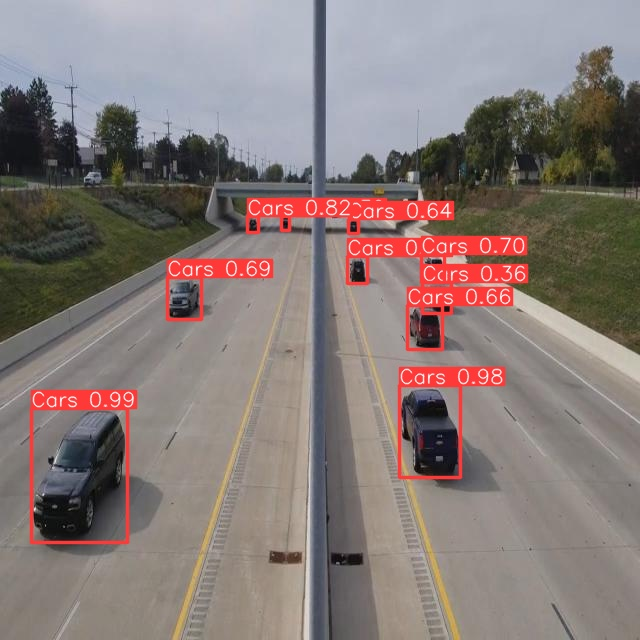

In [9]:
from IPython.display import display, Image
Image(filename='/content/ultralytics/runs/detect/predict/4K-Video-of-Highway-Traffic-_mp4-1_jpg.rf.a99b2c4e7b4c8fdd26ea2d75472ea8bb.jpg')



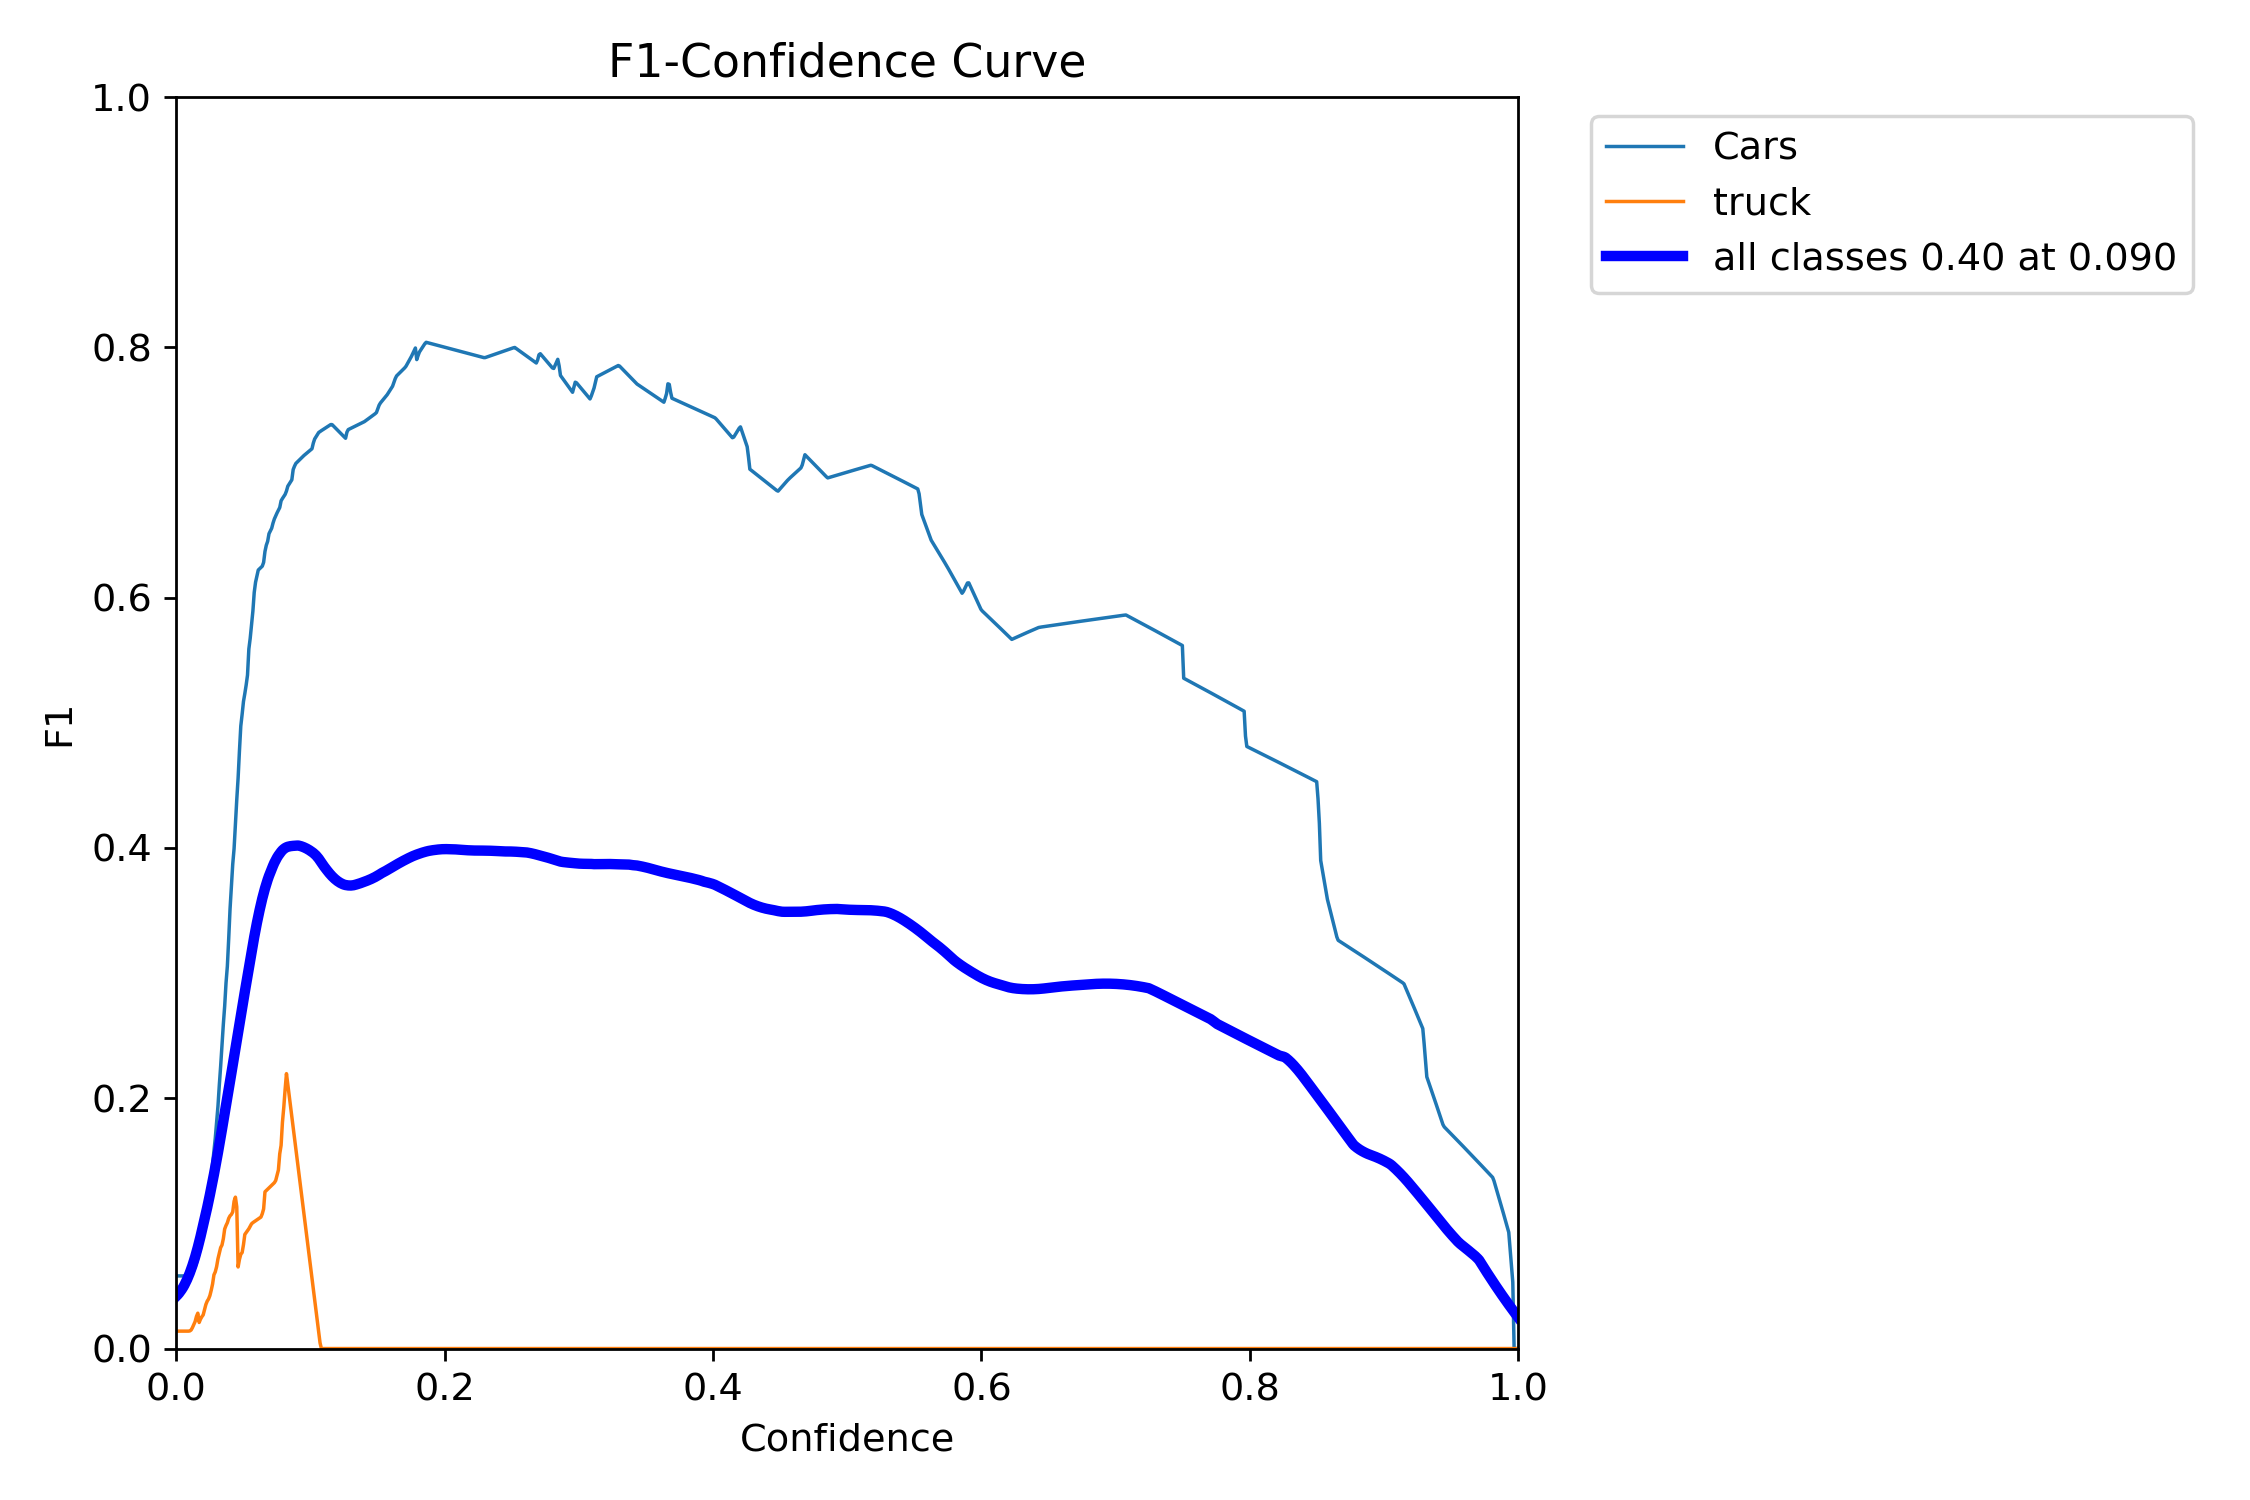

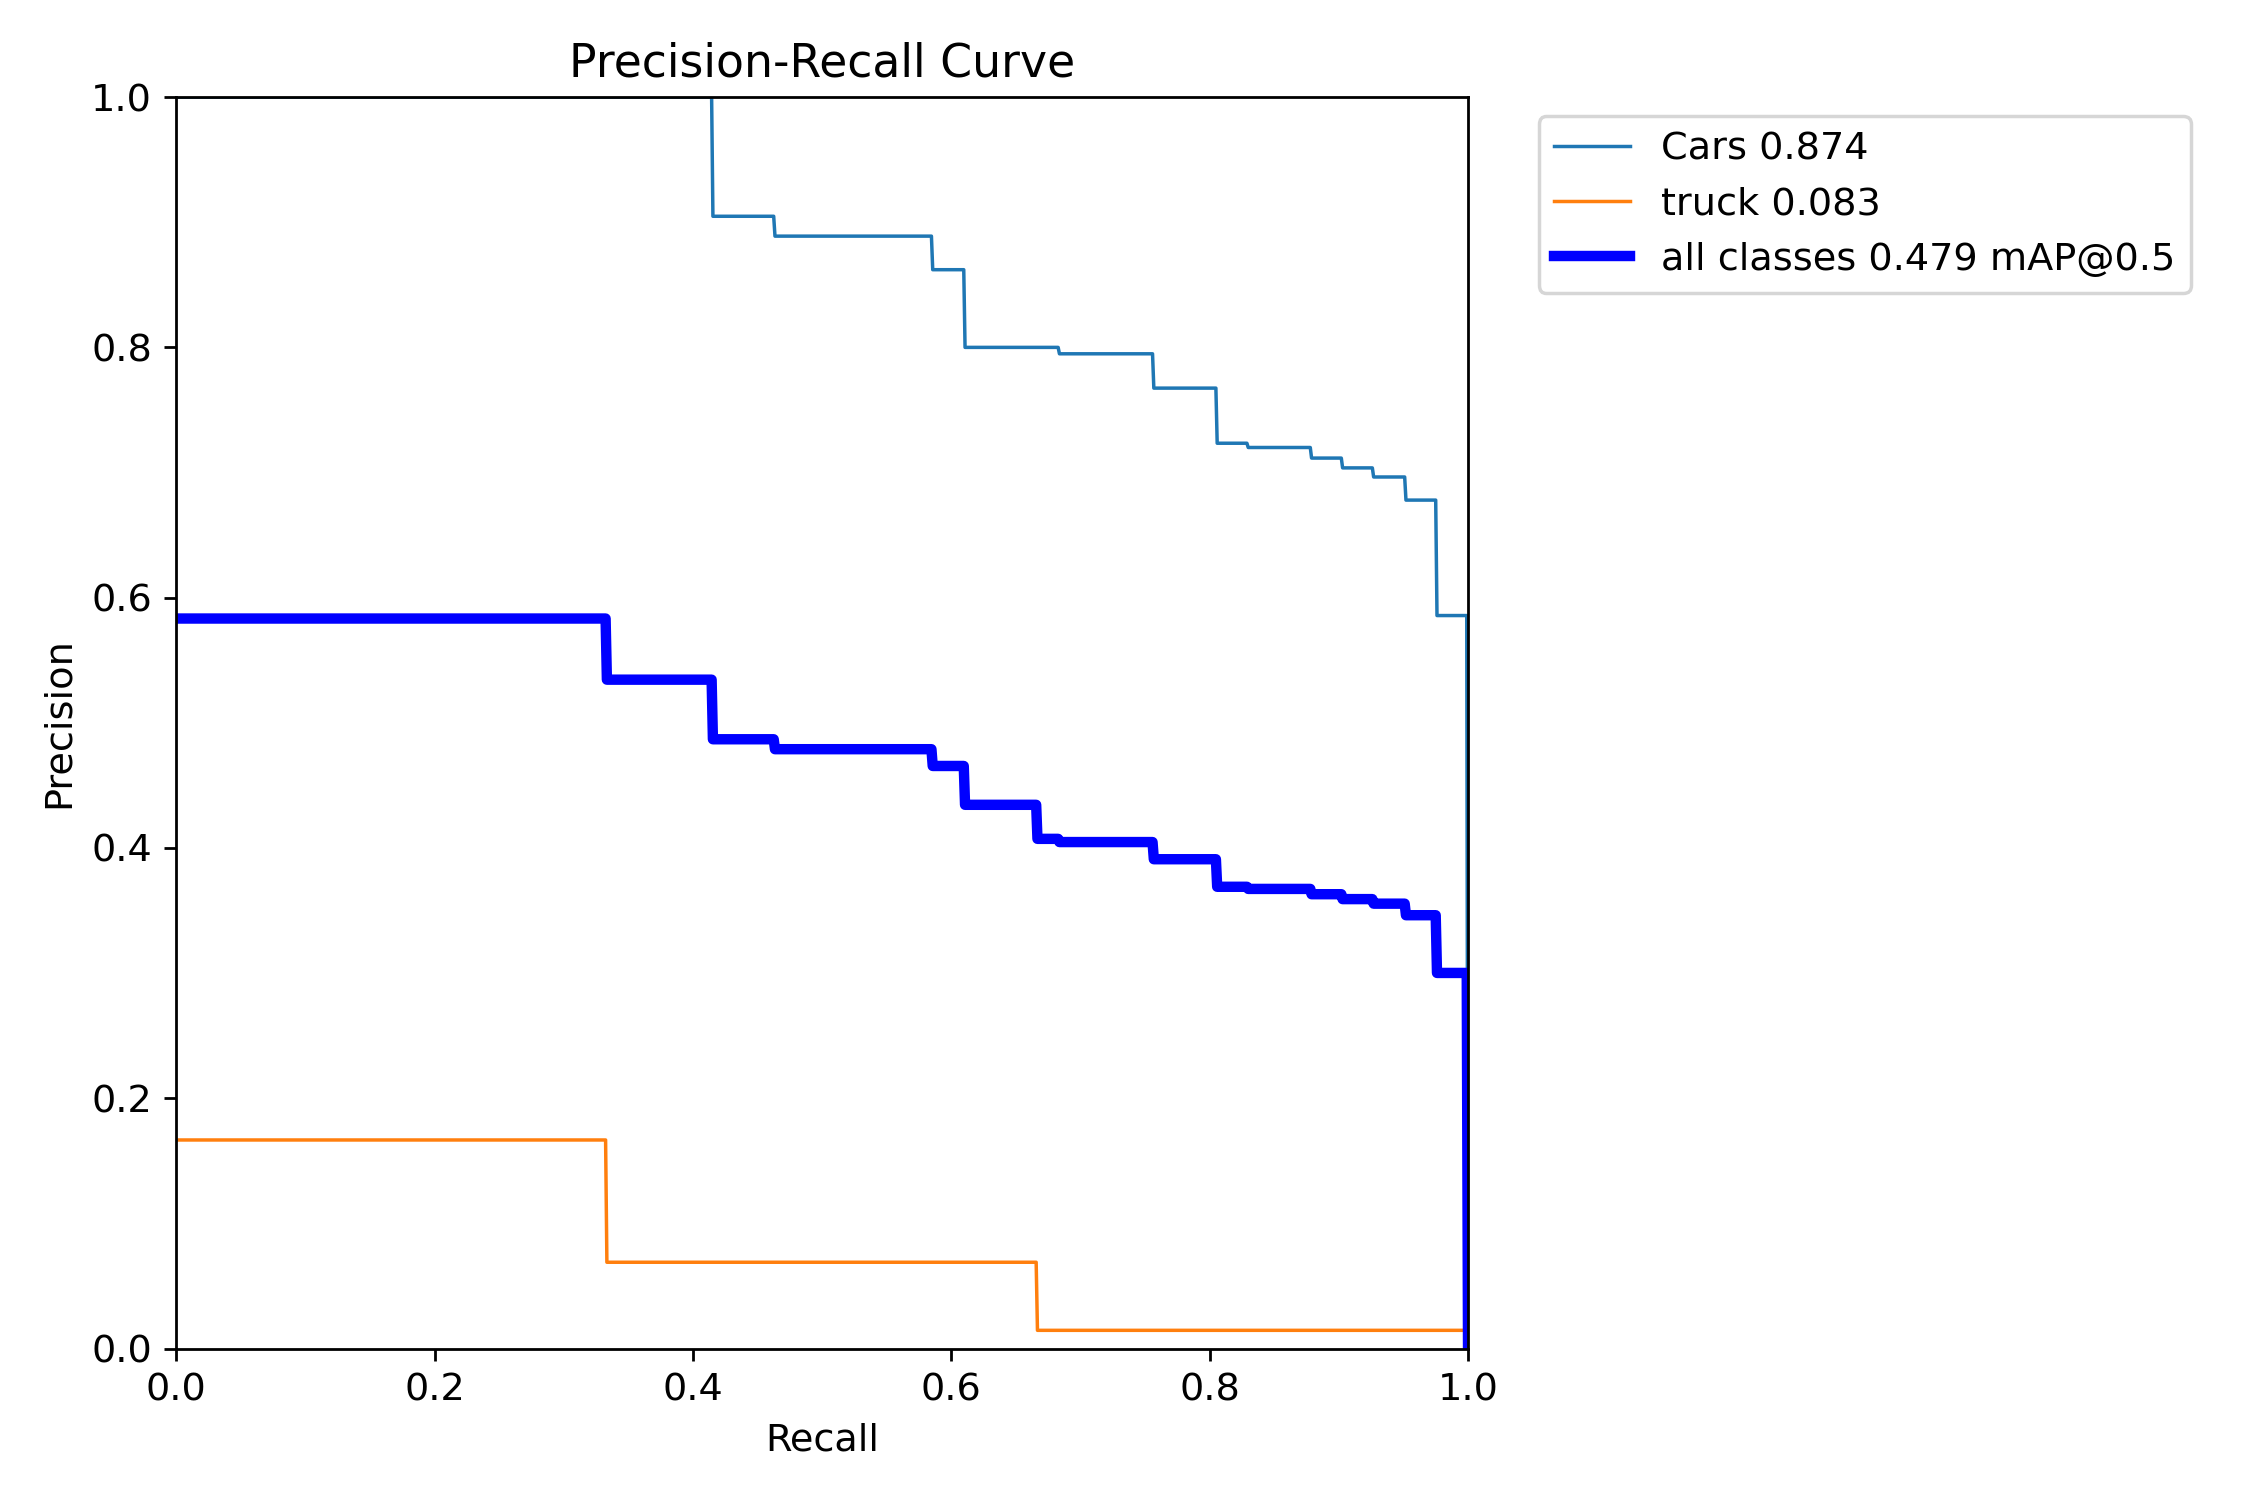

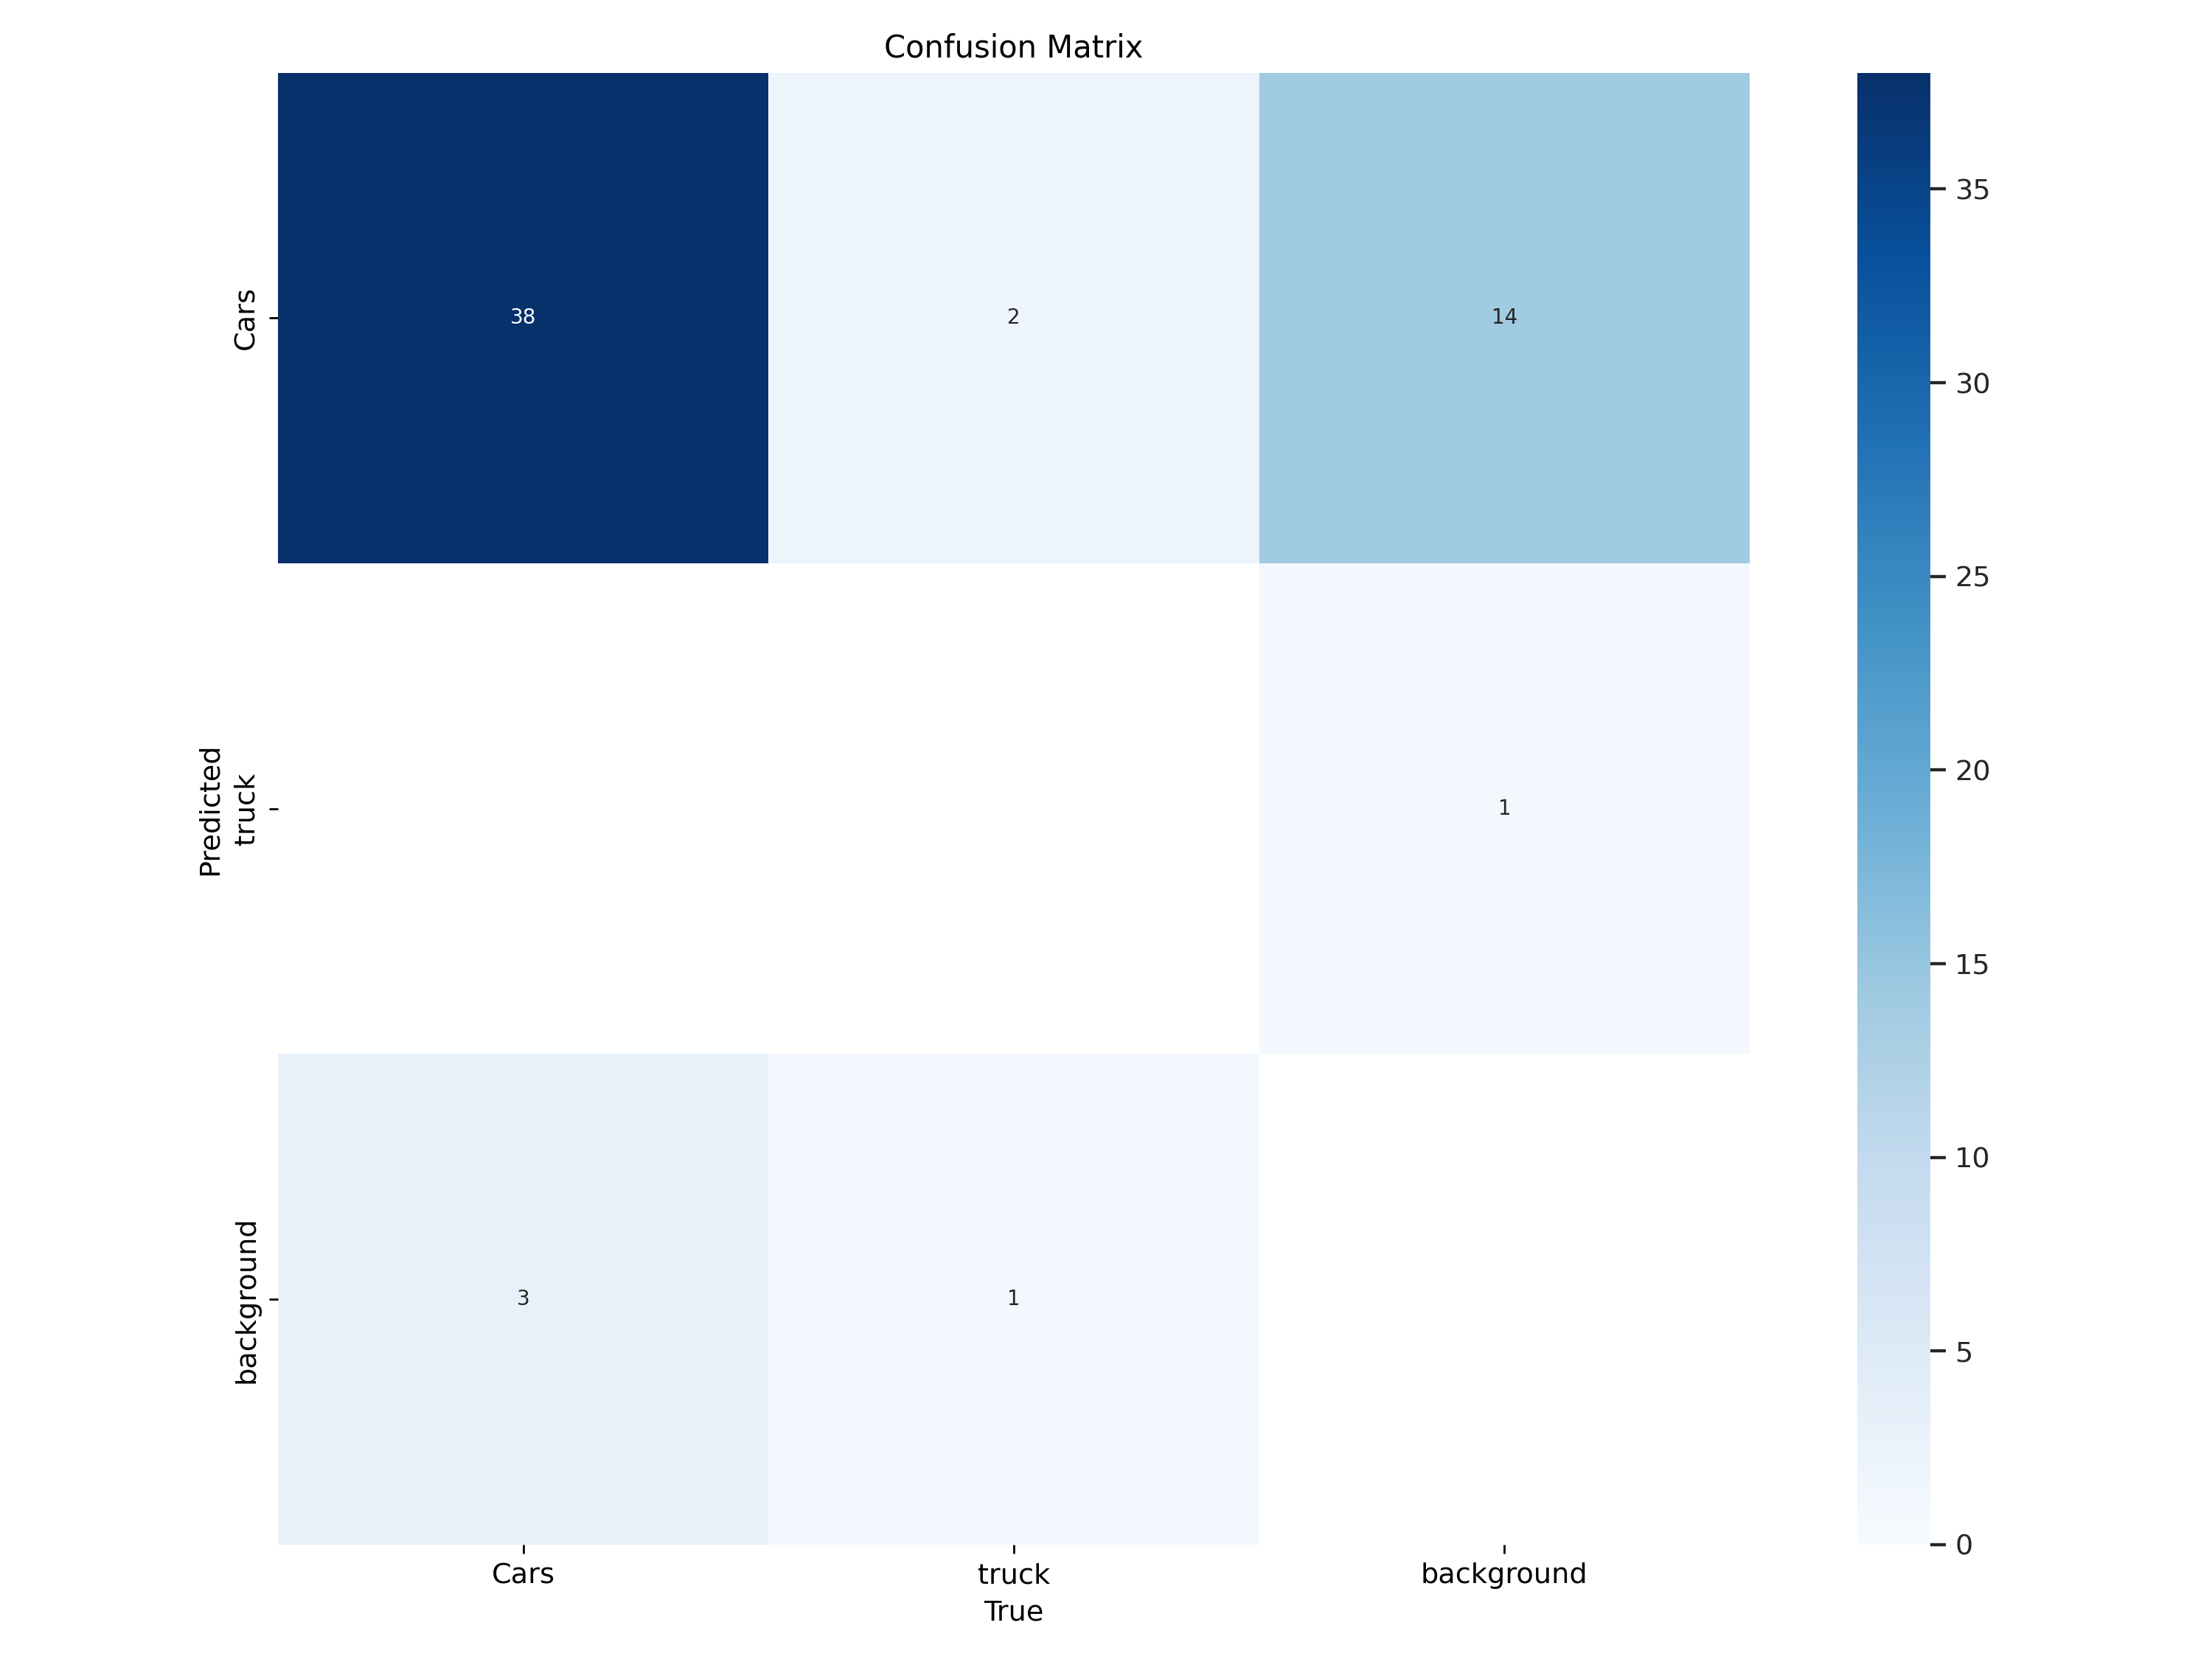

In [11]:

from IPython.display import display
x = Image(filename='/content/ultralytics/runs/detect/train/F1_curve.png')
y = Image(filename='/content/ultralytics/runs/detect/train/PR_curve.png')
z = Image(filename='/content/ultralytics/runs/detect/train/confusion_matrix.png')
display(x, y,z)